In [0]:
#Assignment Group: Section B
#Yeji (Amy) Lee               63843416
#Zhuoer (Stella) Yang         71165437
#Kuang (Steven) Li            46448655
#Tanvir Brar                  36241934
#Teng-Yun (Jacob) Chung       92443989

#People we discussed with outside the team : Yuan Liu


**Question 1 (50 points):** Visit https://www.indeed.com/m/website and search for Data Scientist in Los Angles. Now click on the “Find Jobs” button and you will be able to seethe search results.Please find the top 200 jobs and obtain the frequencies of jobs that mention C, C++, Java, Javascript, Python, R, SQL, Hadoop, Hive, Pig, Spark, AWS and Tableau, respectively.Bonus question (10 points): compare the skill frequencies for Data Science jobs in San Francisco, Los Angeles, New York, Boston, Chicago, Austin and DC.



In [0]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [0]:
#Question 1 Los Angeles
title = []
company = []
location = []
jd = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles%2C+CA"
for i in range(20):
    
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
    ## Change the pages to Next Page
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=

In [0]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
df = pd.DataFrame.from_dict(job)
df

,title,company,location,Job_Description
0,Data Scientist,Deloitte,"Los Angeles, CA 90013",Deloitte Services LP includes internal support...
1,Data Scientist,AvantStay,"Los Angeles, CA","Who we are...\nAvantStay delivers exceptional,..."
2,Data Scientist I - (Part-time),"Columbus Technologies and Services, Inc.","Pasadena, CA 91101",Must be a US Citizen\nEstimated duration of 12...
3,Data Scientist,Age of Learning,"Glendale, CA 91203",Company Overview:\nAge of Learning is a leadin...
4,Data Scientist,NBCUniversal,"Beverly Hills, CA","Fandango is seeking a driven, analytically cur..."
...,...,...,...,...
195,Machine Learning Engineer,Oben,"Pasadena, CA",As a member of the machine language translatio...
196,Sr. Data Analyst,Honk,"Los Angeles, CA 90064",HONK is a fast growing technology company disr...
197,"VP, Data Science, Business Intelligence & Data...",NBCUniversal,"Universal City, CA",Role Summary:\nNBC Entertainment Digital is lo...
198,"Data Analyst - Health, Senior",Blue Shield of California,"Monterey Park, CA",GENERAL SUMMARY:\n\nWe are hiring for a Senior...


In [0]:
python = df.Job_Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
print(python)
C_Language = df.Job_Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
print(C_Language)
Java = df.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
print(Java)
Tableau = df.Job_Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
print(Tableau)
AWS = df.Job_Description.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum()
print(AWS)
Pig = df.Job_Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
print(Pig)
Hive = df.Job_Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
print(Hive)
Hadoop = df.Job_Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
print(Hadoop)
SQL = df.Job_Description.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum()
print(SQL)
R = df.Job_Description.str.contains(r'\b[Rr]\b').sum()
print(R)
C_Plus_Plus = df.Job_Description.str.contains(r'\b[Cc]\+{2}').sum()
print(C_Plus_Plus)
Javascript = df.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
print(Javascript)
Spark = df.Job_Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
print(Spark)
total = python + Javascript + C_Plus_Plus + R + SQL + AWS + Java + Pig + Hive + Hadoop + C_Language + Spark + Tableau
total

147
40
47
51
32
4
13
33
116
108
32
3
36


662

In [0]:
dataLA = [['Python',python, (python/total)*100],
          ['C',C_Language, (C_Language/total)*100],['C++', C_Plus_Plus,(C_Plus_Plus/total)*100],
          ['Java',Java,(Java/total)*100],['Tableau',Tableau,(Tableau/total)*100],['Pig',Pig,(Pig/total)*100],
          ['Hadoop',Hadoop,(Hadoop/total)*100],['SQL',SQL,(SQL/total)*100],['R',R,(R/total)*100],
          ['Javascript',Javascript,(Javascript/total)*100],['Hive',Hive,(Hive/total)*100],['Spark',Spark,(Spark/total)*100],['AWS',AWS,(AWS/total)*100]]

In [0]:
dfLA = pd.DataFrame(dataLA, columns = ['Programming Requirement(LA)', 'Number', 'Percentage']) 
dfLA

,Programming Requirement(LA),Number,Percentage
0,Python,147,22.205438
1,C,40,6.042296
2,C++,32,4.833837
3,Java,47,7.099698
4,Tableau,51,7.703927
5,Pig,4,0.604230
6,Hadoop,33,4.984894
7,SQL,116,17.522659
8,R,108,16.314199
9,Javascript,3,0.453172


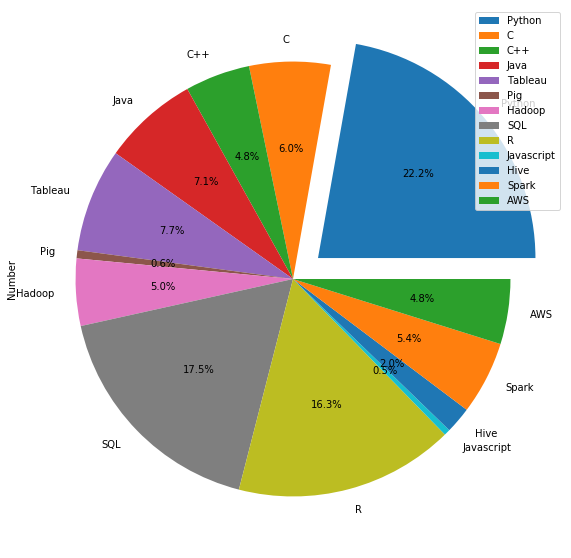

In [0]:
plot = dfLA.plot.pie(y='Number', 
                     labels = dfLA['Programming Requirement(LA)'], figsize=(10, 10),
                     autopct='%1.1f%%', explode=(0.15, 0, 0, 0, 0,0,0,0,0,0,0,0,0))

In [0]:
#San Francisco
title = []
company = []
location = []
jd = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=San+francisco%2C+ca"
for i in range(20):
    
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
    ## Change the pages to Next Page
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=San+francisco%2C+ca&amp;start=110" rel="next"/>]
[<link href="jobs?q

In [0]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
dfSF = pd.DataFrame.from_dict(job)
dfSF

,title,company,location,Job_Description
0,Data Scientist,Blue Owl,"San Francisco, CA",A million people a year die in car collisions ...
1,Data Scientist,States Title Holding,"San Francisco, CA",Create the model that transforms how real esta...
2,Data Scientist (Jr. to Sr. Level),Zachary Piper Solutions,"San Francisco, CA 94107",Piper Companies is currently looking for Data ...
3,Data Scientist,Gap Inc.,"San Francisco, CA",About Gap Inc.\nOur past is full of iconic mom...
4,Data Scientist,Spin Electric Scooters,"San Francisco, CA",About Spin\n\nSpin operates electric scooters ...
...,...,...,...,...
195,Data Scientist,Science 37,"San Francisco, CA",Science 37 is accelerating the research and de...
196,"Data Scientist, Growth Data Science",Square,"San Francisco, CA 94103",Job Description\n\nAs a Data Scientist within ...
197,Senior Data Analyst,"Gametime United, Inc.","San Francisco, CA",About Us:\nLive experiences help people cross ...
198,Sr. Data Scientist - Content (Seattle),Branch,"Redwood City, CA",The Basics:\n-----------\n\nYou will work with...


In [0]:
python = dfSF.Job_Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
print(python)
C_Language = dfSF.Job_Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
print(C_Language)
Java = dfSF.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
print(Java)
Tableau = dfSF.Job_Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
print(Tableau)
AWS = dfSF.Job_Description.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum()
print(AWS)
Pig = dfSF.Job_Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
print(Pig)
Hive = dfSF.Job_Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
print(Hive)
Hadoop = dfSF.Job_Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
print(Hadoop)
SQL = dfSF.Job_Description.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum()
print(SQL)
R = dfSF.Job_Description.str.contains(r'\b[Rr]\b').sum()
print(R)
C_Plus_Plus = dfSF.Job_Description.str.contains(r'\b[Cc]\+{2}').sum()
print(C_Plus_Plus)
Javascript = dfSF.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
print(Javascript)
Spark = dfSF.Job_Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
print(Spark)
total = python + Javascript + C_Plus_Plus + R + SQL + AWS + Java + Pig + Hive + Hadoop + C_Language + Spark + Tableau
total

154
21
27
34
19
6
32
38
119
103
15
5
48


621

In [0]:
dataSF = [['Python',python, (python/total)*100],['C',C_Language, (C_Language/total)*100],['C++', C_Plus_Plus,(C_Plus_Plus/total)*100],['Java',Java,(Java/total)*100],['Tableau',Tableau,(Tableau/total)*100],['Pig',Pig,(Pig/total)*100],['Hadoop',Hadoop,(Hadoop/total)*100],['SQL',SQL,(SQL/total)*100],['R',R,(R/total)*100],['Javascript',Javascript,(Javascript/total)*100],['Hive',Hive,(Hive/total)*100],['Spark',Spark,(Spark/total)*100],['AWS',AWS,(AWS/total)*100]]

In [0]:
dfSF = pd.DataFrame(dataSF, columns = ['Programming Requirement(SF)', 'Number', 'Percentage']) 
dfSF

,Programming Requirement(SF),Number,Percentage
0,Python,154,24.798712
1,C,21,3.381643
2,C++,15,2.415459
3,Java,27,4.347826
4,Tableau,34,5.475040
5,Pig,6,0.966184
6,Hadoop,38,6.119163
7,SQL,119,19.162641
8,R,103,16.586151
9,Javascript,5,0.805153


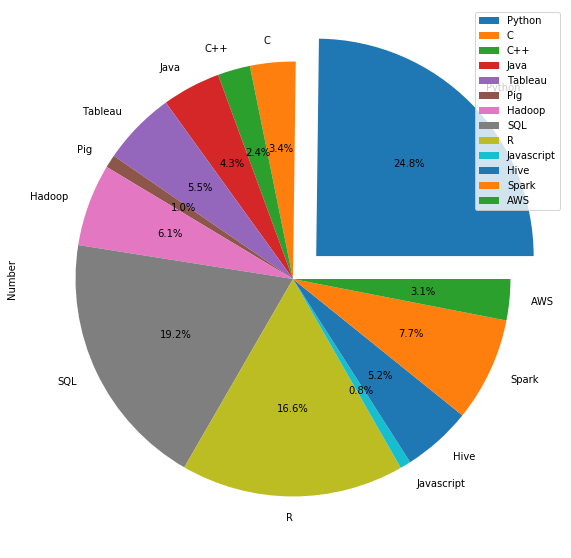

In [0]:
plot = dfSF.plot.pie(y='Number', labels = dfSF['Programming Requirement(SF)'], 
                     figsize=(10, 10),autopct='%1.1f%%',explode=(0.15, 0, 0, 0, 0,0,0,0,0,0,0,0,0))

In [0]:
#New York
title = []
company = []
location = []
jd = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=New+York"
for i in range(20):
    
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
    ## Change the pages to Next Page
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=New+York&amp;start=1

In [0]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
dfNY = pd.DataFrame.from_dict(job)
dfNY

,title,company,location,Job_Description
0,Junior Data Scientist Apprenticeship,IBM,"New York, NY 10002","In the Information Age, data is the most valua..."
1,Data Scientist,13 days ago,"New York, NY",Job Summary10+ years of experience in relevant...
2,Jr. Data Scientist,18 days ago,"New York, NY",Job Title : Jr. Data ScientistJob Location : N...
3,Part Time Data Scientist (Geospatial),22 hours ago,"Bronx, NY 10453",Job Description: The BCC Geospatial Center of ...
4,Data Scientist,Source Enterprises,"New York, NY","Source Systems is now inviting the brightest, ..."
...,...,...,...,...
195,Vice President of Data Science,Teladoc Health,"New York, NY",Mission to Our Employees:\nTeladoc Health is t...
196,Staff ML Engineer - Applied Modeling - Cortex,Twitter,"New York, NY",Who We Are:\n\nTwitter is your window into Wha...
197,Data Science Analyst,PepsiCo,"Purchase, NY",Summary of position:\nDo you want to be a pion...
198,Data Scientist,30+ days ago,"Buffalo, NY 14202",Summary: The Data Scientist is responsible for...


In [0]:
python = dfNY.Job_Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
print(python)
C_Language = dfNY.Job_Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
print(C_Language)
Java = dfNY.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
print(Java)
Tableau = dfNY.Job_Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
print(Tableau)
AWS = dfNY.Job_Description.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum()
print(AWS)
Pig = dfNY.Job_Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
print(Pig)
Hive = dfNY.Job_Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
print(Hive)
Hadoop = dfNY.Job_Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
print(Hadoop)
SQL = dfNY.Job_Description.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum()
print(SQL)
R = dfNY.Job_Description.str.contains(r'\b[Rr]\b').sum()
print(R)
C_Plus_Plus = dfNY.Job_Description.str.contains(r'\b[Cc]\+{2}').sum()
print(C_Plus_Plus)
Javascript = dfNY.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
print(Javascript)
Spark = dfNY.Job_Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
print(Spark)
total = python + Javascript + C_Plus_Plus + R + SQL + AWS + Java + Pig + Hive + Hadoop + C_Language + Spark + Tableau
total

163
15
44
42
17
6
30
43
130
116
11
10
51


678

In [0]:
dataNY = [['Python',python, (python/total)*100],
          ['C',C_Language, (C_Language/total)*100],['C++', C_Plus_Plus,(C_Plus_Plus/total)*100],['Java',Java,(Java/total)*100],[
              'Tableau',Tableau,(Tableau/total)*100],['Pig',Pig,(Pig/total)*100],['Hadoop',Hadoop,(Hadoop/total)*100],
          ['SQL',SQL,(SQL/total)*100],['R',R,(R/total)*100],['Javascript',Javascript,(Javascript/total)*100],['Hive',Hive,(Hive/total)*100],
          ['Spark',Spark,(Spark/total)*100],['AWS',AWS,(AWS/total)*100]]

In [0]:
dfNY = pd.DataFrame(dataNY, columns = ['Programming Requirement(NY)', 'Number', 'Percentage']) 
dfNY

,Programming Requirement(NY),Number,Percentage
0,Python,163,24.041298
1,C,15,2.212389
2,C++,11,1.622419
3,Java,44,6.489676
4,Tableau,42,6.194690
5,Pig,6,0.884956
6,Hadoop,43,6.342183
7,SQL,130,19.174041
8,R,116,17.109145
9,Javascript,10,1.474926


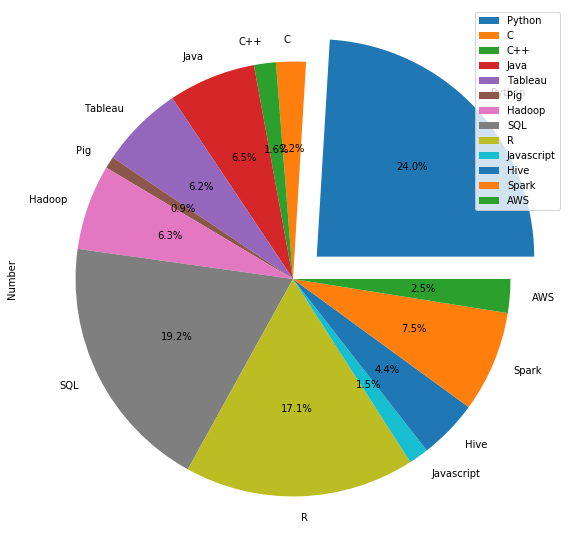

In [0]:
plot = dfNY.plot.pie(y='Number', labels = dfNY['Programming Requirement(NY)'], 
                     figsize=(10, 10),autopct='%1.1f%%',explode=(0.15, 0, 0, 0, 0,0,0,0,0,0,0,0,0))

In [0]:
#Boston
title = []
company = []
location = []
jd = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=Boston"
for i in range(20):
    
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
    ## Change the pages to Next Page
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Boston&amp;start=130" rel="next"/>]
[<link h

In [0]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
dfBO = pd.DataFrame.from_dict(job)
dfBO

,title,company,location,Job_Description
0,Data Scientist (Full-Time),30+ days ago,"Boston, MA","Notes: To apply for this position, please fill..."
1,GIS Specialist (Data Scientist),usajobs.gov,"Cambridge, MA",Duties\nSummary\nThe Volpe Center seeks GIS Sp...
2,Solaria Labs Data Science Coop,Liberty Mutual,"Boston, MA 02101",Who we are:\n\nSolaria Labs was created by Lib...
3,Data Scientist,usajobs.gov,"Cambridge, MA",Duties\nSummary\nThe Volpe Center seeks Data S...
4,Data Scientist (PhD),6 hours ago,"Boston, MA",ProPhDs is seeking a Machine Learning Scientis...
...,...,...,...,...
195,2020 Data Science Graduate Intern,Merck,"Boston, MA",Job Description\nThe Future Talent Program fea...
196,Post Doctoral Data Scientist,Partners HealthCare,"Boston, MA 02114","Our research group applies computational, and ..."
197,"Senior Data Scientist – Visualization, Novarti...",Novartis,"Cambridge, MA",Two companies and one incredible alliance.\n\n...
198,Senior Healthcare Data Analyst,Crossix Solutions,"Boston, MA","Crossix is seeking an intellectually curious, ..."


In [0]:
python = dfBO.Job_Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
print(python)
C_Language = dfBO.Job_Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
print(C_Language)
Java = dfBO.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
print(Java)
Tableau = dfBO.Job_Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
print(Tableau)
AWS = dfBO.Job_Description.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum()
print(AWS)
Pig = dfBO.Job_Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
print(Pig)
Hive = dfBO.Job_Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
print(Hive)
Hadoop = dfBO.Job_Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
print(Hadoop)
SQL = dfBO.Job_Description.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum()
print(SQL)
R = dfBO.Job_Description.str.contains(r'\b[Rr]\b').sum()
print(R)
C_Plus_Plus = dfBO.Job_Description.str.contains(r'\b[Cc]\+{2}').sum()
print(C_Plus_Plus)
Javascript = dfBO.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
print(Javascript)
Spark = dfBO.Job_Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
print(Spark)
total = python + Javascript + C_Plus_Plus + R + SQL + AWS + Java + Pig + Hive + Hadoop + C_Language + Spark + Tableau
total

144
38
40
34
30
3
18
27
89
101
24
6
39


593

In [0]:
dataBO = [['Python',python, (python/total)*100],
          ['C',C_Language, (C_Language/total)*100],['C++', C_Plus_Plus,(C_Plus_Plus/total)*100],
          ['Java',Java,(Java/total)*100],['Tableau',Tableau,(Tableau/total)*100],
          ['Pig',Pig,(Pig/total)*100],['Hadoop',Hadoop,(Hadoop/total)*100],
          ['SQL',SQL,(SQL/total)*100],['R',R,(R/total)*100],['Javascript',Javascript,(Javascript/total)*100],['Hive',Hive,(Hive/total)*100],
          ['Spark',Spark,(Spark/total)*100],['AWS',AWS,(AWS/total)*100]]

In [0]:
dfBO = pd.DataFrame(dataBO, columns = ['Programming Requirement(Boston)', 'Number', 'Percentage']) 
dfBO

,Programming Requirement(Boston),Number,Percentage
0,Python,144,24.283305
1,C,38,6.408094
2,C++,24,4.047218
3,Java,40,6.745363
4,Tableau,34,5.733558
5,Pig,3,0.505902
6,Hadoop,27,4.553120
7,SQL,89,15.008432
8,R,101,17.032040
9,Javascript,6,1.011804


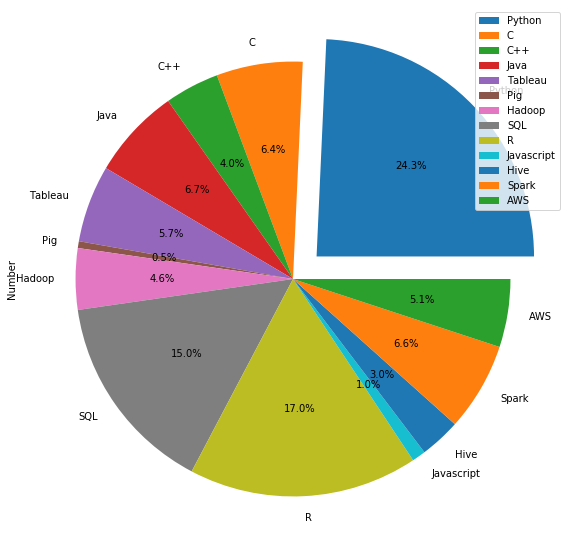

In [0]:
plot = dfBO.plot.pie(y='Number', labels = dfBO['Programming Requirement(Boston)'], 
                     figsize=(10, 10),autopct='%1.1f%%', explode=(0.15, 0, 0, 0, 0,0,0,0,0,0,0,0,0))

In [0]:
#Chicago
title = []
company = []
location = []
jd = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=Chicago"
for i in range(20):
    
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
    ## Change the pages to Next Page
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Chicago&amp;start=130" rel="next

In [0]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
dfCH = pd.DataFrame.from_dict(job)
dfCH

,title,company,location,Job_Description
0,Data Scientist,2 days ago,"Chicago, IL",Role: Data Scientist / Data EngineerLocation: ...
1,Data Scientist,Deloitte,"Chicago, IL 60606",Deloitte Services LP includes internal support...
2,Data Scientist (Entry Level),Strike Social,"Chicago, IL 60606",Why Work With Us\nStrike is a leader in the fa...
3,Data Scientist,"Press Ganey Associates, Inc.","Chicago, IL 60606",About Press Ganey\n\nPress Ganey pioneered the...
4,Data Scientist,Nielsen,"Chicago, IL 60647",Data Scientist - 46672\nData Science - USA Chi...
...,...,...,...,...
195,Data Engineer (Data Science),UL,"Chicago, IL",Overview\nUL is seeking an experienced data en...
196,Senior Data Scientist,Mintel,"Chicago, IL 60612",The Senior Data Scientist is a technical leade...
197,Software Engineer and Data Analyst,Cloudquant,"Chicago, IL",The Software Engineer and Data Analyst will jo...
198,Sr. Data Scientist,Tiger Analytics,"Chicago, IL",Tiger Analytics is a fast-growing advanced ana...


In [0]:
python = dfCH.Job_Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
print(python)
C_Language = dfCH.Job_Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
print(C_Language)
Java = dfCH.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
print(Java)
Tableau = dfCH.Job_Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
print(Tableau)
AWS = dfCH.Job_Description.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum()
print(AWS)
Pig = dfCH.Job_Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
print(Pig)
Hive = dfCH.Job_Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
print(Hive)
Hadoop = dfCH.Job_Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
print(Hadoop)
SQL = dfCH.Job_Description.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum()
print(SQL)
R = dfCH.Job_Description.str.contains(r'\b[Rr]\b').sum()
print(R)
C_Plus_Plus = dfCH.Job_Description.str.contains(r'\b[Cc]\+{2}').sum()
print(C_Plus_Plus)
Javascript = dfCH.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
print(Javascript)
Spark = dfCH.Job_Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
print(Spark)
total = python + Javascript + C_Plus_Plus + R + SQL + AWS + Java + Pig + Hive + Hadoop + C_Language + Spark + Tableau
total

142
35
22
37
38
5
19
43
101
117
26
8
39


632

In [0]:
dataCH = [['Python',python, (python/total)*100],
          ['C',C_Language, (C_Language/total)*100],['C++', C_Plus_Plus,(C_Plus_Plus/total)*100],
          ['Java',Java,(Java/total)*100],['Tableau',Tableau,(Tableau/total)*100],
          ['Pig',Pig,(Pig/total)*100],['Hadoop',Hadoop,(Hadoop/total)*100],
          ['SQL',SQL,(SQL/total)*100],['R',R,(R/total)*100],['Javascript',Javascript,(Javascript/total)*100],['Hive',Hive,(Hive/total)*100],
          ['Spark',Spark,(Spark/total)*100],['AWS',AWS,(AWS/total)*100]]

In [0]:
dfCH = pd.DataFrame(dataCH, columns = ['Programming Requirement(Chicago)', 'Number', 'Percentage']) 
dfCH

,Programming Requirement(Chicago),Number,Percentage
0,Python,142,22.468354
1,C,35,5.537975
2,C++,26,4.113924
3,Java,22,3.481013
4,Tableau,37,5.854430
5,Pig,5,0.791139
6,Hadoop,43,6.803797
7,SQL,101,15.981013
8,R,117,18.512658
9,Javascript,8,1.265823


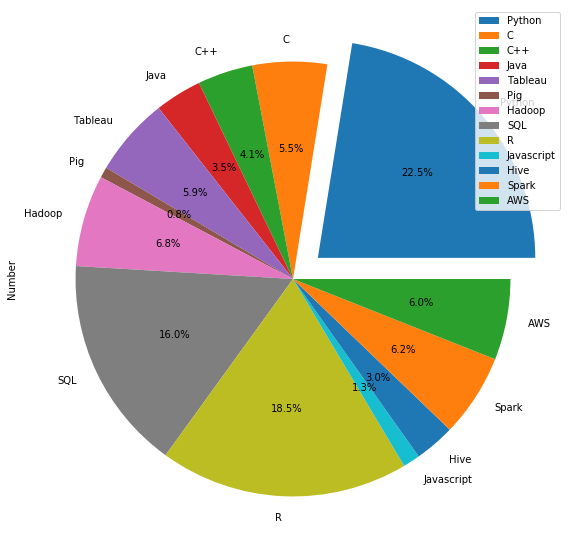

In [0]:
plot = dfCH.plot.pie(y='Number', labels = dfCH['Programming Requirement(Chicago)'], 
                     figsize=(10, 10),autopct='%1.1f%%',explode=(0.15, 0, 0, 0, 0,0,0,0,0,0,0,0,0))

In [0]:
#Austin
# We Just have 170 positions for Austin since it only has 17 pages.
title = []
company = []
location = []
jd = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=Austin"
for i in range(17):
    
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
    ## Change the pages to Next Page
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Austin&amp;start=130" rel="next"/>]
[<link h

In [0]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
dfAU = pd.DataFrame.from_dict(job)
dfAU

,title,company,location,Job_Description
0,Chemical Data Scientist,30+ days ago,"Austin, TX",www.tceq.texas.govState Title: Chemist IVJob P...
1,Data Scientist,Apple,"Austin, TX 78758","Summary\nPosted: Oct 28, 2019\nWeekly Hours: 4..."
2,Data Scientist - Sports,5 days ago,"Austin, TX 78703",We are seeking data scientists / quantitative ...
3,Data Scientist @ Apple Inc.,8 days ago,"Austin, TX",Responsibilities: Develop Data Science Algorit...
4,Machine Learning Scientist,Apple,"Austin, TX 78758","Summary\nPosted: Oct 22, 2019\nRole Number: 20..."
...,...,...,...,...
165,"Artificial Intelligence, Consultant - Applied ...",Deloitte,"Austin, TX",Full Stack Developer\nWhile analytics isn't ne...
166,Senior Machine Learning Engineer,Talroo,"Austin, TX",About Talroo\n\nWe are honored to be recognize...
167,"Software Engineer, Machine Learning",SailPoint Technologies Holdings,"Austin, TX","At SailPoint, we do things differently. We und..."
168,Conversational Artificial Intelligence Archite...,Deloitte,"Austin, TX",Work you’ll do\n\nAt Deloitte you will manage ...


In [0]:
python = dfAU.Job_Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
print(python)
C_Language = dfAU.Job_Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
print(C_Language)
Java = dfAU.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
print(Java)
Tableau = dfAU.Job_Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
print(Tableau)
AWS = dfAU.Job_Description.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum()
print(AWS)
Pig = dfAU.Job_Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
print(Pig)
Hive = dfAU.Job_Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
print(Hive)
Hadoop = dfAU.Job_Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
print(Hadoop)
SQL = dfAU.Job_Description.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum()
print(SQL)
R = dfAU.Job_Description.str.contains(r'\b[Rr]\b').sum()
print(R)
C_Plus_Plus = dfAU.Job_Description.str.contains(r'\b[Cc]\+{2}').sum()
print(C_Plus_Plus)
Javascript = dfAU.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
print(Javascript)
Spark = dfAU.Job_Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
print(Spark)
total = python + Javascript + C_Plus_Plus + R + SQL + AWS + Java + Pig + Hive + Hadoop + C_Language + Spark + Tableau
total

113
53
47
36
27
5
24
26
97
72
42
12
56


610

In [0]:
dataAU = [['Python',python, (python/total)*100],
          ['C',C_Language, (C_Language/total)*100],['C++', C_Plus_Plus,(C_Plus_Plus/total)*100],
          ['Java',Java,(Java/total)*100],['Tableau',Tableau,(Tableau/total)*100],
          ['Pig',Pig,(Pig/total)*100],['Hadoop',Hadoop,(Hadoop/total)*100],
          ['SQL',SQL,(SQL/total)*100],['R',R,(R/total)*100],['Javascript',Javascript,(Javascript/total)*100],['Hive',Hive,(Hive/total)*100],
          ['Spark',Spark,(Spark/total)*100],['AWS',AWS,(AWS/total)*100]]

In [0]:
dfAU = pd.DataFrame(dataAU, columns = ['Programming Requirement(Austin)', 'Number', 'Percentage']) 
dfAU

,Programming Requirement(Austin),Number,Percentage
0,Python,113,18.524590
1,C,53,8.688525
2,C++,42,6.885246
3,Java,47,7.704918
4,Tableau,36,5.901639
5,Pig,5,0.819672
6,Hadoop,26,4.262295
7,SQL,97,15.901639
8,R,72,11.803279
9,Javascript,12,1.967213


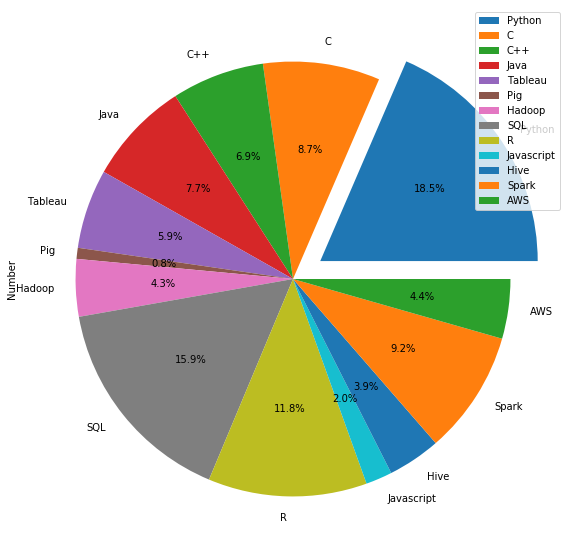

In [0]:
plot = dfAU.plot.pie(y='Number', labels = dfAU['Programming Requirement(Austin)'], 
                     figsize=(10, 10),autopct='%1.1f%%',explode=(0.15, 0, 0, 0, 0,0,0,0,0,0,0,0,0))

In [0]:
#Washington DC
title = []
company = []
location = []
jd = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=washington+dc"
for i in range(20):
    
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url= 'http://www.indeed.com/m/'+each['href']
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
    ## Change the pages to Next Page
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=washington+dc&amp;start=120" rel="next"/>]
[

In [0]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
dfDC = pd.DataFrame.from_dict(job)
dfDC

,title,company,location,Job_Description
0,Federal - Data Scientist,Accenture,"Washington, DC 20006",Organization: Accenture Federal Services\nLoca...
1,Entry level Data Scientist,5 days ago,"Herndon, VA",Job SummaryIdeal candidate should have a degre...
2,Graduate Studies Program - Data Scientist,Central Intelligence Agency,"Washington, DC",As a Data Scientist Graduate Intern for the CI...
3,Data Scientist,Assent Advisory Group,"Washington, DC","Full Time\nWashington, D.C.\nJob Description:\..."
4,Undergraduate Internship/Co-op Program - Data ...,Central Intelligence Agency,"Washington, DC",As a Data Scientist Undergraduate Intern for t...
...,...,...,...,...
195,Data Scientist - Data Analyst - Campus Associate,Guidehouse,"Washington, DC 20006",Overview\nInterested in working with talented ...
196,Data Science Consultant,1 day ago,"Herndon, VA 20170",Job SummaryIdeal candidate should have a degre...
197,Data Scientist,Nehemiah Security,"Tysons Corner, VA",Nehemiah Security is in search of Mid to Senio...
198,Data Scientist,Datastrong,"Washington, DC",Data Scientist/Data Engineer\nLocation: Washin...


In [0]:
python = dfDC.Job_Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
print(python)
C_Language = dfDC.Job_Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
print(C_Language)
Java = dfDC.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
print(Java)
Tableau = dfDC.Job_Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
print(Tableau)
AWS = dfDC.Job_Description.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum()
print(AWS)
Pig = dfDC.Job_Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
print(Pig)
Hive = dfDC.Job_Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
print(Hive)
Hadoop = dfDC.Job_Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
print(Hadoop)
SQL = dfDC.Job_Description.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum()
print(SQL)
R = dfDC.Job_Description.str.contains(r'\b[Rr]\b').sum()
print(R)
C_Plus_Plus = dfDC.Job_Description.str.contains(r'\b[Cc]\+{2}').sum()
print(C_Plus_Plus)
Javascript = dfDC.Job_Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
print(Javascript)
Spark = dfDC.Job_Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
print(Spark)
total = python + Javascript + C_Plus_Plus + R + SQL + AWS + Java + Pig + Hive + Hadoop + C_Language + Spark + Tableau
total

129
42
32
45
41
8
16
21
103
105
15
6
35


598

In [0]:
dataDC = [['Python',python, (python/total)*100],
          ['C',C_Language, (C_Language/total)*100],['C++', C_Plus_Plus,(C_Plus_Plus/total)*100],
          ['Java',Java,(Java/total)*100],['Tableau',Tableau,(Tableau/total)*100],
          ['Pig',Pig,(Pig/total)*100],['Hadoop',Hadoop,(Hadoop/total)*100],
          ['SQL',SQL,(SQL/total)*100],['R',R,(R/total)*100],['Javascript',Javascript,(Javascript/total)*100],['Hive',Hive,(Hive/total)*100],
          ['Spark',Spark,(Spark/total)*100],['AWS',AWS,(AWS/total)*100]]

In [0]:
dfDC = pd.DataFrame(dataDC, columns = ['Programming Requirement(DC)', 'Number', 'Percentage']) 
dfDC

,Programming Requirement(DC),Number,Percentage
0,Python,129,21.571906
1,C,42,7.023411
2,C++,15,2.508361
3,Java,32,5.351171
4,Tableau,45,7.525084
5,Pig,8,1.337793
6,Hadoop,21,3.511706
7,SQL,103,17.224080
8,R,105,17.558528
9,Javascript,6,1.003344


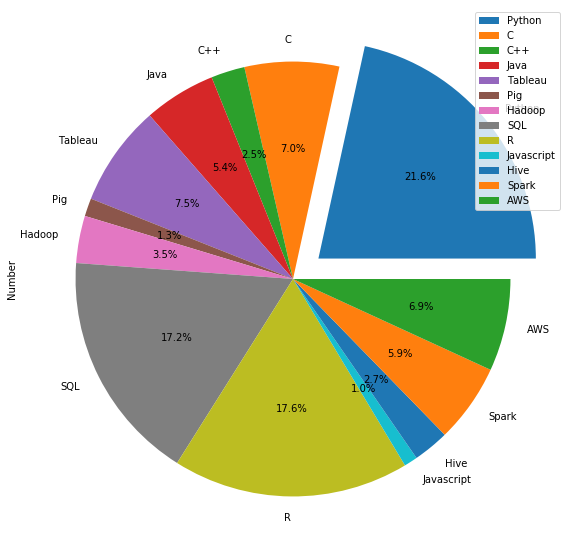

In [0]:
plot = dfDC.plot.pie(y='Number', labels = dfDC['Programming Requirement(DC)'], 
                     figsize=(10, 10),autopct='%1.1f%%',
                     explode=(0.15, 0, 0, 0, 0,0,0,0,0,0,0,0,0))

Combine all of the cities

In [0]:
cityset = ['Los+Angeles',
          'San+Francisco',
          'Boston',
          'New+York',
          'Chicago',
          'Austin',
          'DC']

In [0]:
MR = 20
cities = []
titles = []
companies = []
locations = []
jd = []

for city in cityset:
    url = 'https://www.indeed.com/m/jobs?q=data+scientist&l=' + str(city)
    print(city)
    
    for i in range(0,MR):
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs = {'rel':['nofollow']})
        
        for each in all_matches:
            jd_url= 'https://www.indeed.com/m/'+each['href']
            jd_page =urlopen(jd_url)
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll(attrs={'id':['desc']})
            titles.append(jd_soup.body.p.b.font.text)
            cities.append(city)
            companies.append(jd_desc[0].span.text)
            locations.append(jd_soup.body.p.span.text)
            jd.append(jd_desc[0].text)
        url = 'https://www.indeed.com/m/jobs?q=data+scientist&l=' + str(city) + '&start=' +str((i+1)*10)
        print(url)

Los+Angeles
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=10
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=20
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=30
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=40
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=50
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=60
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=70
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=80
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=90
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=100
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=110
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=120
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=130
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=140
htt

In [0]:
job_city = {'city': cities, 'title':titles, 'company':companies, 'location':locations, 'jd':jd}
dfcity = pd.DataFrame.from_dict(job_city)
dfcity.to_csv('city.csv')
dfcity

,city,title,company,location,jd
0,Los+Angeles,Data Scientist,Deloitte,"Los Angeles, CA 90013",Deloitte Services LP includes internal support...
1,Los+Angeles,Data Scientist,AvantStay,"Los Angeles, CA","Who we are...\nAvantStay delivers exceptional,..."
2,Los+Angeles,Data Scientist I - (Part-time),"Columbus Technologies and Services, Inc.","Pasadena, CA 91101",Must be a US Citizen\nEstimated duration of 12...
3,Los+Angeles,Data Scientist,Age of Learning,"Glendale, CA 91203",Company Overview:\nAge of Learning is a leadin...
4,Los+Angeles,Data Scientist,NBCUniversal,"Beverly Hills, CA","Fandango is seeking a driven, analytically cur..."
...,...,...,...,...,...
1394,DC,"Social/Data Scientist, Military Personnel Anal...",Fors Marsh Group,"Arlington, VA 22201","At Fors Marsh Group (FMG), we combine the powe..."
1395,DC,Data Scientist,"The Cadmus Group, Inc.","Washington, DC","At Cadmus, our Homeland Security Sector provid..."
1396,DC,Computer Scientist / Data Analytic,D3 AIR AND SPACE OPERATIONS INC,"Washington, DC 20024",D3 Air and Space Operations has a contingency ...
1397,DC,"Machine Learning Scientist, Customer Resiliency",Capital One,"McLean, VA","McLean 2 (19052), United States of America, Mc..."


In [0]:
dfcity[dfcity['city'] == 'Los+Angeles']
dfcity[dfcity['city'] == 'San+Francisco']
dfcity[dfcity['city'] == 'Boston']
dfcity[dfcity['city'] == 'New+York']
dfcity[dfcity['city'] == 'Chicago']
dfcity[dfcity['city'] == 'Austin']
dfcity[dfcity['city'] == 'DC']

pythonlist=[]
pythonlist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
pythonlist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
pythonlist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
pythonlist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
pythonlist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
pythonlist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
pythonlist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
pythonlist

[145, 157, 142, 164, 145, 123, 127]

In [0]:
Clist=[]
Clist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
Clist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
Clist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
Clist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
Clist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
Clist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
Clist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
Clist

[36, 25, 39, 19, 32, 69, 47]

In [0]:
Javalist=[]
Javalist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
Javalist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
Javalist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
Javalist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
Javalist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
Javalist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
Javalist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
Javalist

[39, 32, 43, 41, 19, 63, 37]

In [0]:
Tableaulist=[]
Tableaulist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())
Tableaulist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())
Tableaulist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())
Tableaulist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())
Tableaulist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())
Tableaulist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())
Tableaulist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())
Tableaulist

[46, 30, 34, 34, 36, 34, 48]

In [0]:
AWSlist=[]
AWSlist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum())
AWSlist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum())
AWSlist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum())
AWSlist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum())
AWSlist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum())
AWSlist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum())
AWSlist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Aa][Ww][Ss]\b|\b[Aa]mazon [Ww]eb [Ss]ervice\b').sum())
AWSlist

[33, 24, 31, 18, 41, 41, 42]

In [0]:
Piglist=[]
Piglist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
Piglist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
Piglist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
Piglist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
Piglist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
Piglist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
Piglist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
Piglist

[3, 8, 1, 5, 6, 8, 7]

In [0]:
Hivelist=[]
Hivelist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
Hivelist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
Hivelist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
Hivelist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
Hivelist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
Hivelist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
Hivelist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
Hivelist

[13, 33, 16, 29, 19, 28, 11]

In [0]:
Hadooplist=[]
Hadooplist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
Hadooplist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
Hadooplist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
Hadooplist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
Hadooplist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
Hadooplist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
Hadooplist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
Hadooplist

[34, 39, 21, 36, 47, 40, 17]

In [0]:
SQLlist=[]
SQLlist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum())
SQLlist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum())
SQLlist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum())
SQLlist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum())
SQLlist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum())
SQLlist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum())
SQLlist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'[Ss][Qq][Ll]|[Qq]uery [Ll]anguage').sum())
SQLlist

[119, 112, 96, 128, 101, 101, 95]

In [0]:
Rlist = []
Rlist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Rr]\b').sum())
Rlist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Rr]\b').sum())
Rlist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Rr]\b').sum())
Rlist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Rr]\b').sum())
Rlist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Rr]\b').sum())
Rlist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Rr]\b').sum())
Rlist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Rr]\b').sum())
Rlist

[108, 102, 102, 115, 119, 87, 101]

In [0]:
C_Plus_Plus_list = []
C_Plus_Plus_list.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Cc]\+{2}').sum())
C_Plus_Plus_list.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Cc]\+{2}').sum())
C_Plus_Plus_list.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Cc]\+{2}').sum())
C_Plus_Plus_list.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Cc]\+{2}').sum())
C_Plus_Plus_list.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Cc]\+{2}').sum())
C_Plus_Plus_list.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Cc]\+{2}').sum())
C_Plus_Plus_list.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Cc]\+{2}').sum())
C_Plus_Plus_list

[30, 18, 27, 13, 20, 57, 26]

In [0]:
Javascriptlist = []
Javascriptlist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
Javascriptlist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
Javascriptlist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
Javascriptlist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
Javascriptlist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
Javascriptlist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
Javascriptlist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
Javascriptlist

[2, 6, 7, 11, 9, 15, 11]

In [0]:
Sparklist = []
Sparklist.append(dfcity[dfcity['city'] == 'Los+Angeles'].jd.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
Sparklist.append(dfcity[dfcity['city'] == 'San+Francisco'].jd.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
Sparklist.append(dfcity[dfcity['city'] == 'Boston'].jd.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
Sparklist.append(dfcity[dfcity['city'] == 'New+York'].jd.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
Sparklist.append(dfcity[dfcity['city'] == 'Chicago'].jd.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
Sparklist.append(dfcity[dfcity['city'] == 'Austin'].jd.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
Sparklist.append(dfcity[dfcity['city'] == 'DC'].jd.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
Sparklist

[39, 53, 31, 46, 46, 71, 26]

In [0]:
frequency = {'City': cityset,
    'Python': pythonlist,
            'C': Clist,
            'Java': Javalist,
            'Tableau': Tableaulist,
            'AWS': AWSlist,
            'Pig':Piglist,
            'Hive': Hivelist,
            'Hadoop': Hadooplist,
            'SQL': SQLlist,
            'R': Rlist,
            'C++': C_Plus_Plus_list,
            'Javascript': Javascriptlist,
            'Spark': Sparklist}

In [0]:
FrequencyData = pd.DataFrame(frequency)
FrequencyData

,City,Python,C,Java,Tableau,AWS,Pig,Hive,Hadoop,SQL,R,C++,Javascript,Spark
0,Los+Angeles,145,36,39,46,33,3,13,34,119,108,30,2,39
1,San+Francisco,157,25,32,30,24,8,33,39,112,102,18,6,53
2,Boston,142,39,43,34,31,1,16,21,96,102,27,7,31
3,New+York,164,19,41,34,18,5,29,36,128,115,13,11,46
4,Chicago,145,32,19,36,41,6,19,47,101,119,20,9,46
5,Austin,123,69,63,34,41,8,28,40,101,87,57,15,71
6,DC,127,47,37,48,42,7,11,17,95,101,26,11,26


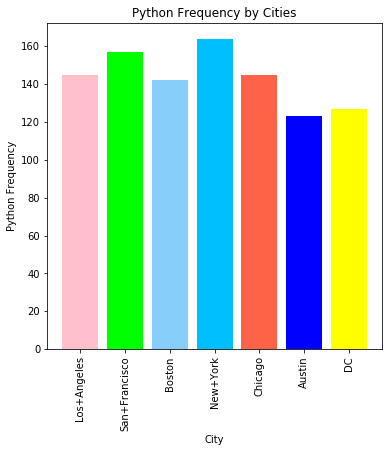

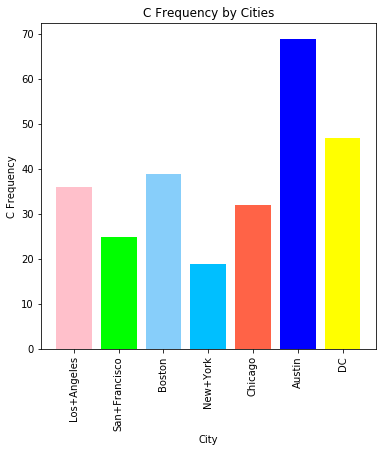

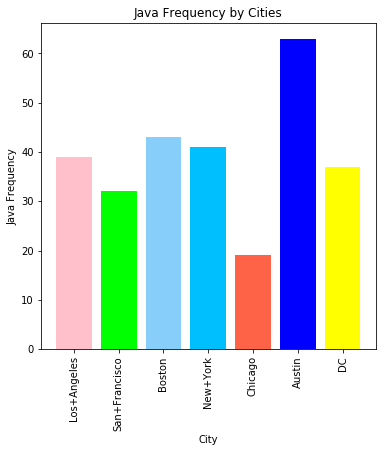

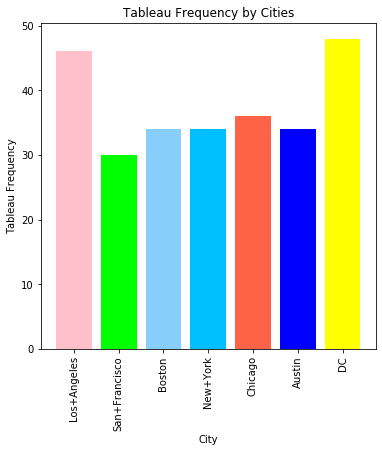

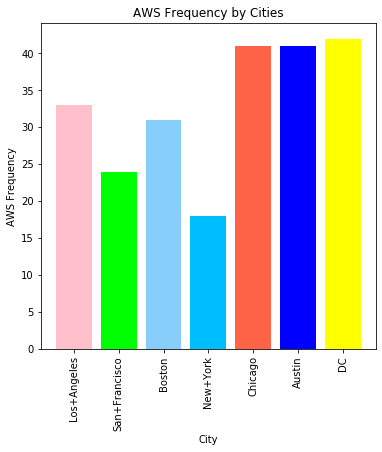

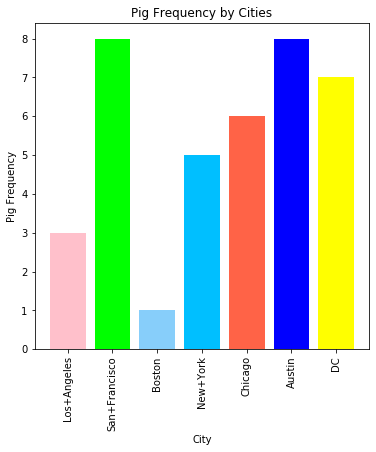

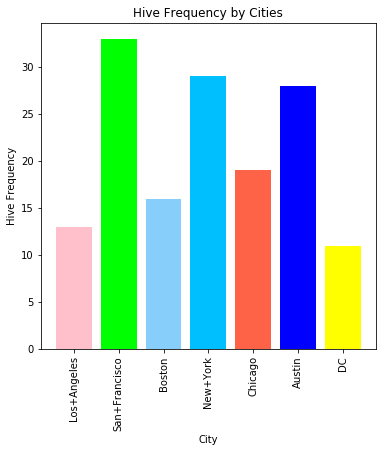

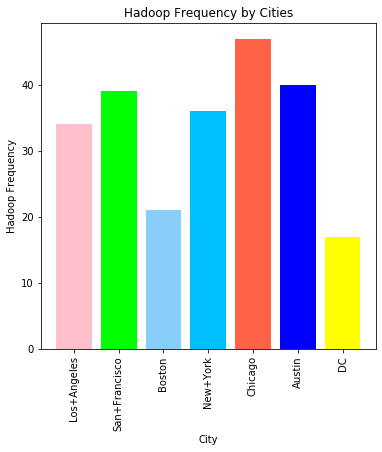

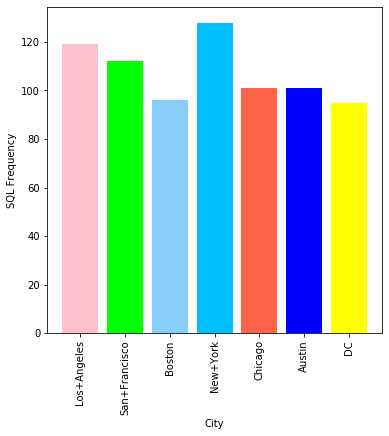

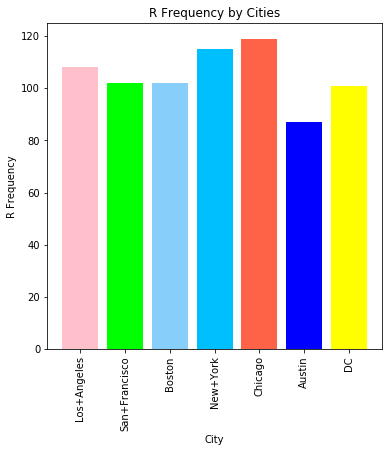

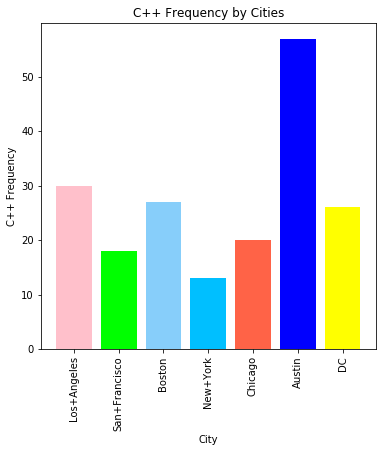

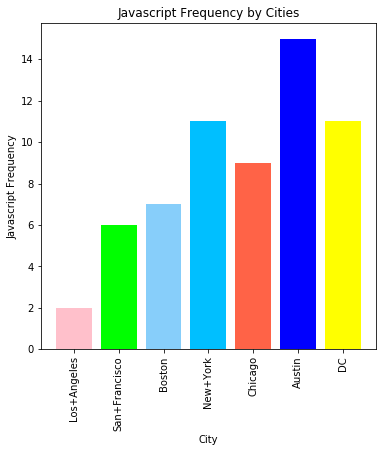

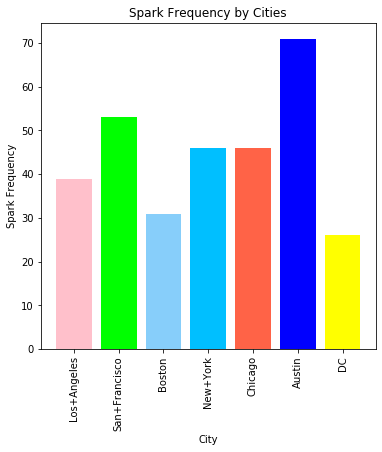

In [0]:
#Python
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Python'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Python Frequency')
plt.xlabel('City')
plt.title('Python Frequency by Cities')
plt.show()

#C
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['C'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('C Frequency')
plt.xlabel('City')
plt.title('C Frequency by Cities')
plt.show()

#Java
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Java'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Java Frequency')
plt.xlabel('City')
plt.title('Java Frequency by Cities')
plt.show()

#Tableau
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Tableau'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Tableau Frequency')
plt.xlabel('City')
plt.title('Tableau Frequency by Cities')
plt.show()

#AWS
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['AWS'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('AWS Frequency')
plt.xlabel('City')
plt.title('AWS Frequency by Cities')
plt.show()

#Pig
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Pig'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Pig Frequency')
plt.xlabel('City')
plt.title('Pig Frequency by Cities')
plt.show()

#Hive
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Hive'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Hive Frequency')
plt.xlabel('City')
plt.title('Hive Frequency by Cities')
plt.show()

#Hadoop
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Hadoop'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Hadoop Frequency')
plt.xlabel('City')
plt.title('Hadoop Frequency by Cities')
plt.show()

#SQL
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['SQL'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('SQL Frequency')
plt.xlabel('City')
plt.show()

#R
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['R'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('R Frequency')
plt.xlabel('City')
plt.title('R Frequency by Cities')
plt.show()

#C++
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['C++'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('C++ Frequency')
plt.xlabel('City')
plt.title('C++ Frequency by Cities')
plt.show()

#Javascript
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Javascript'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Javascript Frequency')
plt.xlabel('City')
plt.title('Javascript Frequency by Cities')
plt.show()

#Spark
my_colors = ['pink','lime','lightskyblue','deepskyblue','tomato','blue','yellow']
fig = plt.figure(figsize=(6, 6))
plt.bar(FrequencyData['City'], FrequencyData['Spark'], color = my_colors)
plt.xticks(FrequencyData['City'], rotation = 90)
plt.ylabel('Spark Frequency')
plt.xlabel('City')
plt.title('Spark Frequency by Cities')
plt.show()

###Question 2 (50 points):
###Visit https://www.indeed.com/Top-Rated-Workplaces, and search for Data Scientist in Los Angeles. Scrape 50 company reviews of the first 50 companies (if fewer than 50, just get the companies names on the first page). Retrieve the company’s name, title of the reviewer, the date of the review, the title, rating, review content, pros, and cons and the review. The output canto be shown in the form of a table.

In [0]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

In [0]:
companies = []
reviewers = []
dates = []
titles = []
rates = []
contents = []
pros = []
cons = []

url = "https://www.indeed.com/cmp?q=Data+scientist&l=Los+Angeles%2C+CA&from=discovery"
page = urlopen(url)
soup = BeautifulSoup(page, 'lxml')
all_matches = soup.findAll('a',{'class':['cmp-CompanyWidget-name']})
for each in all_matches:
    jd_url= 'https://www.indeed.com'+each['href']+'/reviews'
    for i in range (3):
        jd_page =urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_reviewsC = jd_soup.findAll('div',{'class':'cmp-review-container'})
        for container in jd_reviewsC:
            jd_cmp = jd_soup.find('div',{'itemprop':'name'}).text
            companies.append(jd_cmp)
            jd_reviewerT = container.findAll('span',{'itemprop':'reviewBody'})
            for it1 in jd_reviewerT:
                if it1 == None:
                    reviewers.append('N/A')
                else:
                    reviewers.append(it1.text)
            jd_dateR = container.findAll('span',{'class':'cmp-review-date-created'})
            for it2 in jd_dateR:
                if it2 == None:
                    dates.append('N/A')
                else:
                    dates.append(it2.text)
            jd_titleR = container.findAll('div',{'class':'cmp-review-title'})
            for it3 in jd_titleR:
                if it3 == None:
                    titles.append('N/A')
                else:
                    titles.append(it3.span.text)
            jd_rating = container.findAll('div',{'class':'cmp-ratingNumber'})
            for it4 in jd_rating:
                if it4 == None:
                    rates.append('N/A')
                else:
                    rates.append(it4.text)
            jd_contentR = container.findAll('span',{'itemprop':'reviewBody'})
            for it5 in jd_contentR:
                if it5 == None:
                    contents.append('N/A')
                else:
                    contents.append(it5.text)
            if not container.find('div',{'class':'cmp-review-pro-text'}):
                pros.append('N/A')
            else:
                pros.append(container.find('div',{'class':'cmp-review-pro-text'}).text)
            if not container.find('div',{'class':'cmp-review-con-text'}):
                cons.append('N/A')
            else:
                cons.append(container.find('div',{'class':'cmp-review-con-text'}).text)
                
        print(jd_url)
        jd_url = 'https://www.indeed.com'+each['href']+'/reviews'+ '?start=' +str((i+1)*20)


https://www.indeed.com/cmp/Veritone/reviews
https://www.indeed.com/cmp/Veritone/reviews?start=20
https://www.indeed.com/cmp/Veritone/reviews?start=40
https://www.indeed.com/cmp/Hulu/reviews
https://www.indeed.com/cmp/Hulu/reviews?start=20
https://www.indeed.com/cmp/Hulu/reviews?start=40
https://www.indeed.com/cmp/Deloitte/reviews
https://www.indeed.com/cmp/Deloitte/reviews?start=20
https://www.indeed.com/cmp/Deloitte/reviews?start=40
https://www.indeed.com/cmp/City-National-Bank/reviews
https://www.indeed.com/cmp/City-National-Bank/reviews?start=20
https://www.indeed.com/cmp/City-National-Bank/reviews?start=40
https://www.indeed.com/cmp/University-of-California-Los-Angeles/reviews
https://www.indeed.com/cmp/University-of-California-Los-Angeles/reviews?start=20
https://www.indeed.com/cmp/University-of-California-Los-Angeles/reviews?start=40
https://www.indeed.com/cmp/Zs-Associates/reviews
https://www.indeed.com/cmp/Zs-Associates/reviews?start=20
https://www.indeed.com/cmp/Zs-Associates/

In [0]:
data = {'company': companies,
        'title':titles,
       'rate':rates,
       'date':dates,
       'reviewer':reviewers,
       'content':contents,
        'pro':pros,
        'con':cons}

In [0]:
df = pd.DataFrame.from_dict(data)
df

,company,title,rate,date,reviewer,content,pro,con
0,Veritone,"Great people, but planning leaves something to...",3.0,"June 24, 2019",- Relaxed work hours where most managers don't...,- Relaxed work hours where most managers don't...,N/A,N/A
1,Veritone,Good company with creative atomsphere,5.0,"January 2, 2019",A company offers good atmosphere at creative t...,A company offers good atmosphere at creative t...,N/A,N/A
2,Veritone,"Has potential, but job stability is always in ...",3.0,"January 7, 2018",Too many parts moving at the same time with un...,Too many parts moving at the same time with un...,Cool new industry,Random unexplained lay-offs
3,Veritone,Start up company with amazing AI promise,3.0,"October 2, 2017",Great AI resources coming out of this soon to ...,Great AI resources coming out of this soon to ...,Cutting edge company,Start ups usual challenges
4,Veritone,"Great people, but planning leaves something to...",3.0,"June 24, 2019",- Relaxed work hours where most managers don't...,- Relaxed work hours where most managers don't...,N/A,N/A
...,...,...,...,...,...,...,...,...
1839,Penn Schoen Berland,Pretty young and hip workplace,5.0,"August 5, 2015",Most of the people I worked with were younger ...,Most of the people I worked with were younger ...,N/A,N/A
1840,Penn Schoen Berland,Intelligent people passionate about research,3.0,"May 7, 2012","Interesting clients, fascinating findings are ...","Interesting clients, fascinating findings are ...",great coworkers,compensation packages seemed low; no 401k plan
1841,Penn Schoen Berland,Fun work environment,4.0,"June 11, 2019",Typical day included calling out of state to d...,Typical day included calling out of state to d...,N/A,N/A
1842,Penn Schoen Berland,Pretty young and hip workplace,5.0,"August 5, 2015",Most of the people I worked with were younger ...,Most of the people I worked with were younger ...,N/A,N/A


In [0]:
df32 = df.drop_duplicates(subset = ['title', 'date', 'rate', 'reviewer'],keep = 'first')
df32

,company,title,rate,date,reviewer,content,pro,con
0,Veritone,"Great people, but planning leaves something to...",3.0,"June 24, 2019",- Relaxed work hours where most managers don't...,- Relaxed work hours where most managers don't...,N/A,N/A
1,Veritone,Good company with creative atomsphere,5.0,"January 2, 2019",A company offers good atmosphere at creative t...,A company offers good atmosphere at creative t...,N/A,N/A
2,Veritone,"Has potential, but job stability is always in ...",3.0,"January 7, 2018",Too many parts moving at the same time with un...,Too many parts moving at the same time with un...,Cool new industry,Random unexplained lay-offs
3,Veritone,Start up company with amazing AI promise,3.0,"October 2, 2017",Great AI resources coming out of this soon to ...,Great AI resources coming out of this soon to ...,Cutting edge company,Start ups usual challenges
8,Hulu,It's okay,3.0,"October 25, 2019",I loved working here in the beginning. Once th...,I loved working here in the beginning. Once th...,N/A,N/A
...,...,...,...,...,...,...,...,...
1833,Infosys,Compensation is not fair.,1.0,"September 11, 2019",Compensation doesn't match with the market at ...,Compensation doesn't match with the market at ...,N/A,N/A
1834,Infosys,Nice Working in Infosys,5.0,"September 11, 2019",The value system of the company is noteworthy....,The value system of the company is noteworthy....,N/A,N/A
1835,Penn Schoen Berland,Fun work environment,4.0,"June 11, 2019",Typical day included calling out of state to d...,Typical day included calling out of state to d...,N/A,N/A
1836,Penn Schoen Berland,Pretty young and hip workplace,5.0,"August 5, 2015",Most of the people I worked with were younger ...,Most of the people I worked with were younger ...,N/A,N/A
